```{admonition} Lecture Materials
:class: tip
[Download the slide deck for this lecture](/_static/pdf/Lecture20-StatisticalPhysics-2.pdf)
```

# Simulated annealing

Simulated annealing is an optimization technique designed to approximate a globally optimal solution to a given problem. A simple example of such a problem is **finding a global maximum or minimum of a function**.

The method is closely related to the Metropolis algorithm.
Recall that for zero temperature $T = 0$ we would never move to a state with a higher energy in the Metropolis algorithm, but would eventually be stuck in a state which minimizes the energy.
However, if our set of moves only allows us to move to neighboring microstates, we may end up being stuck in a local minimum as opposed to the global minimum.
This issue is less relevant at finite temperature $T > 0$, since there is always a chance to get out of the local minimum by occasionally accepting a move to a state with higher energy.

This logic can be applied to finding the minimum of a function.

Say we are probing different values of $x$.
- For $T = 0$ we would always only accept a state with a lower value of $f(x)$, thus ending up in at least a local minimum.
- For $T > 0$, however, we will have also the possibility to explore a broader range of $x$ values, and possibly moving away from a local minimum to the global one.

We start out with a large value of $T$ which will allow us to cover initially a broad range of possibilities for finding the minimum.
Eventually we will want to narrow down our search which can be achieved by lowering the temperature and thus preferably accepting values which tend to minimize the function more.
Eventually, the temperature can be set to zero to narrow the search down to a single minimum.

The method is not guaranteed converge to the exact global minimum but can yield good approximate solution if the method of choosing candidates moves and the **cooling schedule** (the decrease of $T$ with time) are chosen appropriately for the problem at hand.

## Function minimum

Let us consider the following function as an example,

$$
f(x) = x^2 - \cos(4\pi x)
$$

which has several local minima

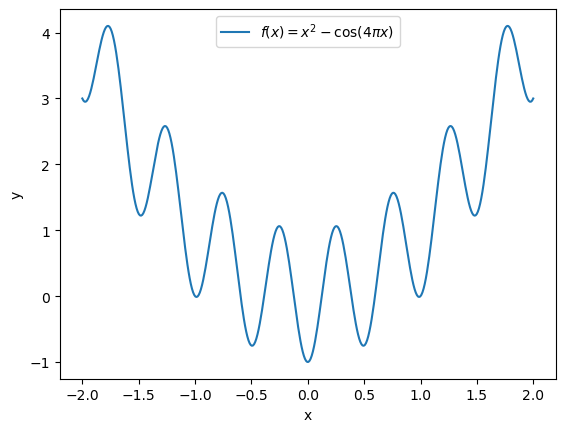

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - np.cos(4*np.pi*x)
flabel = "${f(x) = x^2 - \cos(4\pi x)}$"

xplot = np.linspace(-2,2,400)
yplot = f(xplot)

plt.plot(xplot,yplot, label=flabel)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Metropolis algorithm

The global minimum is at $x = 0$, but also many local minima are present in the vicinity of $x = \pm 1$.
Standard algorithms can thus end up in a local minimum instead of the global one.

In the simulated annealing procedure we will randomly pick a new value of $x_{\rm cand}$.
We will consider $x_{\rm cand}$ in the neighborhood of $x$, for instance, by sampling from Gaussian distribution with $\sigma = 1$ (the value of sigma can be varied).
The new value $x_{\rm cand}$ will be accepted with a probability from the Metropolis method:

$$
p_{a} = e^{-[f(x_{\rm cand}) - f(x)]/T}~.
$$

### Cooling schedule

The cooling schedule is chosen in the exponential form

$$
T_n = T_{\rm max} e^{-n/\tau}.
$$

The process proceeds until the temperature decreases below a certain threshold $T_{\rm min}$.

In [3]:
# A single step of the simulated annealing process at temperature T
# for finding the minimum of a function f(x)
# The candidate move xcand is sampled from a Gaussian distribution
# around the present value of x, with a condition xmin <= xcand <= xmax
# The move is accepted with the Metropolis based probability
def simulated_annealing_step(f, T, x, sigma, xmin = -1e9, xmax = 1e9):
    fnow = f(x)
    xcand = np.random.normal(x,sigma)
    while (xcand < xmin or xcand > xmax):
        xcand = np.random.normal(x,sigma)
    fcand = f(xcand)
    if (fcand < fnow or (T>0 and np.random.rand() < np.exp(-(fcand-fnow)/T))):
        return xcand
    else:
        return x

### Simulation

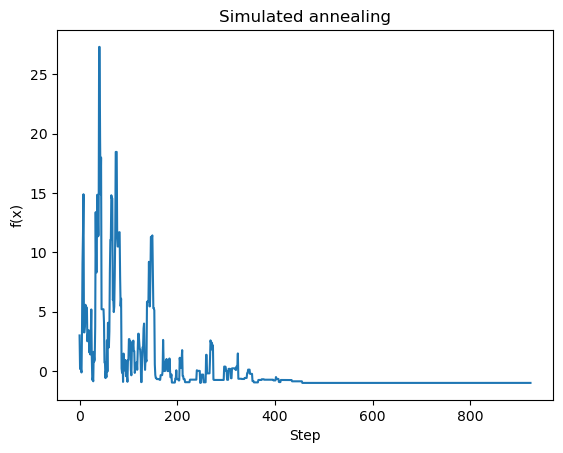

In [9]:
# Let us take our function and try to find its minimum
# with simulated annealing
def f(x):
    return x**2 - np.cos(4*np.pi*x)
flabel = "f(x) = x^2 - cos(4\pi x)"

# Initial guess
x = 2
# Step size
sigma = 1.

# Minimum temperature
Tmin = 1.e-3

# Initial (maximum) temperature
Tmax = 10.
T = Tmax

# Cooling rate
t = 0
tau = 100.

fs = [f(x)]

# Simulate the annealing process
while (T > Tmin):
    T = Tmax * np.exp(-t/tau)
    x = simulated_annealing_step(f, T, x, sigma)
    t += 1
    fs.append(f(x))
        
# Plot the results
plt.title("Simulated annealing")
plt.plot(fs, label=flabel)
plt.xlabel("Step")
plt.ylabel("f(x)")
plt.show()

![annealing1](img/annealing1.gif)

## Example 2

Another example

$$
f(x) = \cos(x) + \cos(\sqrt{2}x) + \cos(\sqrt{3}x)
$$

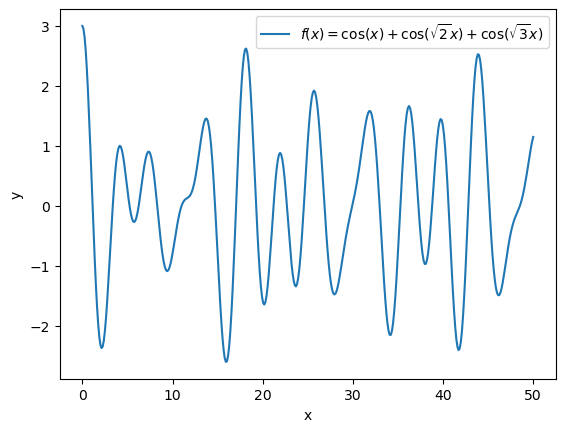

In [8]:
def f(x):
    return np.cos(x) + np.cos(np.sqrt(2)*x) + np.cos(np.sqrt(3)*x)

flabel = "${f(x) = \cos(x) + \cos(\sqrt{2}x) + \cos(\sqrt{3}x)}$"

xplot = np.linspace(0,50,400)
yplot = f(xplot)

plt.plot(xplot,yplot, label=flabel)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Let us try to find the global one with simulated annealing in range $x \in [0,50]$.

In [12]:
x = 50 * np.random.rand()
sigma = 5.
Tmin = 1.e-3
Tmax = 10.
T = Tmax
t = 0
tau = 100.

while (T > Tmin):
    T = Tmax * np.exp(-t/tau)
    x = simulated_annealing_step(f, T, x, sigma, 0, 50)
    #print(T," ",x," ",f(x))
    # sigma *= np.exp(-1./tau)
    t += 1

Run 1            |  Run 2
:-------------------------:|:-------------------------:
![](img/annealing2.gif)  |  ![](img/annealing3.gif)